In [ ]:
# ! pip install opencv-contrib-python
# ! pip install imutils

### Image Read

In [1]:
import cv2

file = 'Imgs/sky.jpg'
img = cv2.imread(file)
# img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

if img is not None:
    img = cv2.resize(img, dsize=(640, 480), interpolation=cv2.INTER_AREA)
    
    cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()
else:
    print('no image')

### Video Read

Index terms
`CAP_PROP_FRAME_WIDTH`
`CAP_PROP_FRAME_HEIGHT`
`CAP_PROP_FPS`
`CAP_PROP_ZOOM`

In [3]:
import cv2
import imutils

file = 'Videos/vehicle_1.mp4'

cap = cv2.VideoCapture(file)

width, height = cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
print('width, height = ', width, height)

fps = cap.get(cv2.CAP_PROP_FPS)
print('fps = ', fps)

zoom = cap.get(cv2.CAP_PROP_ZOOM)
print('zoom = ', zoom)


# RESIZE
# width, height = width / 2, height / 2
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, width) -> not working :(
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height) -> not working :(
# width, height = cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
# print('* width, height = ', width, height)


if cap.isOpened():
    while True:
        ret, img = cap.read()
              
        if ret:
            # RESIZE (it's working!)
            img = imutils.resize(img, width=320)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            cv2.imshow(file, img)
            cv2.waitKey(33)
        else:
            break
else:
    print('cannot open the file')
    
cap.release()
cv2.destroyAllWindows()

width, height =  1074.0 550.0
fps =  30.021428571428572
zoom =  0.0


### Region of interest

In [2]:
import cv2

file = 'Imgs/sky.jpg'
img = cv2.imread(file)

x, y, w, h = 675, 100, 150, 150
roi = img[y:y+h, x:x+w]

print(roi.shape)

cv2.rectangle(roi, (0, 0), (h-1, w-1), (0, 0, 255)) # (0, 0, 255) : Red <- (Consider BGR!!!)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(150, 150, 3)


In [7]:
import cv2

file = 'Imgs/sky.jpg'
img = cv2.imread(file)

x, y, w, h = 675, 100, 150, 150
roi = img[y:y+h, x:x+w]
# img2 = roi.copy()

img[y:y+h, x+w:x+2*w] = roi

cv2.rectangle(img, (x, y), (x+2*w + 15, y+h + 15), (0, 0, 255)) # (0, 0, 255) : Red <- (Consider BGR!!!)

cv2.imshow('img', img)
cv2.imshow('roi', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Using mouse

In [ ]:
import cv2
 
isDragging = False
x0, y0, w, h = -1, -1, -1, -1
blue, red = (255, 0, 0), (0, 0, 255)
 
def onMouse(event, x, y, flags, param):
    global isDragging, x0, y0, img
    if event == cv2.EVENT_LBUTTONDOWN:
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:
        if isDragging:
            img_draw = img.copy()
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2)
            cv2.imshow('img', img_draw)
    elif event == cv2.EVENT_LBUTTONUP:
        if isDragging:
            isDragging = False
            w = x - x0
            h = y - y0
            if w > 0 and h > 0:
                img_draw = img.copy()
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2)
                cv2.imshow('img', img_draw)
                roi = img[y0:y0+h, x0:x0+w]
                cv2.imshow('cropped', roi)
                cv2.moveWindow('cropped', 0, 0)
                cv2.imwrite('./cropped.png', roi)
            else:
                cv2.imshow('img', img)
                print('drag should start from left-top side')


file = 'Imgs/sky.jpg'
img = cv2.imread(file)
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse)
cv2.waitKey()
cv2.destroyAllWindows()

### Alpha-blending

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt
 
file1 = 'Imgs/cat.jpg'
file2 = 'Imgs/dog.jpg'
    
img1 = cv2.imread(file1)
img2 = cv2.imread(file2)
 
alpha = 0.5
dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
cv2.imshow('cv2.addWeighted', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.4) /tmp/pip-req-build-th1mncc2/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
 
file1 = 'Imgs/cat.jpg'
file2 = 'Imgs/dog.jpg'
    
img1 = cv2.imread(file1)
img2 = cv2.imread(file2)

img1 = cv2.resize(img1, dsize=(640, 480), interpolation=cv2.INTER_AREA)
img2 = cv2.resize(img2, dsize=(640, 480), interpolation=cv2.INTER_AREA)
 
alpha = 0.5
dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
cv2.imshow('cv2.addWeighted', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Bitwise Operation
`bitwise_and`
`bitwise_or`
`bitwise_Xor`
`bitwise_Not`

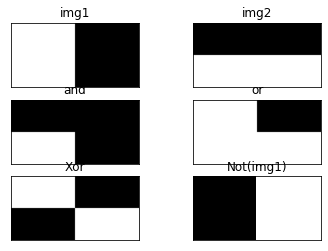

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt
 
img1 = np.zeros((200, 400))
img2 = np.zeros((200, 400))
 
img1[:, :200] = 255 # 좌측만 흰색
img2[100:200, :] = 255 # 아래쪽만 흰색
 
bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)
 
imgs = {'img1': img1, 'img2':img2, 'and':bitAnd, 'or': bitOr, 'Xor': bitXor, 'Not(img1)': bitNot}
 
for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3, 2, i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([])
    
plt.show()

### 카메라 영상 출력하기

In [3]:
import cv2
 
cap = cv2.VideoCapture(0)
# cap으로 영상을 불러옵니다.
 
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 500)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 300)
# 영상 프레임 사이즈를 결정합니다.
 
if cap.isOpened():
# 만약 카메라가 실행되고 있다면,
    ret, a = cap.read()
    # ret: True False value입니다.
    # a: 영상 프레임을 읽어옵니다.
 
    while ret:
    # 제대로 카메라를 불러왔다면~ 반복문을 실행합니다. 
        ret, a = cap.read()
        cv2.imshow("camera", a)
        # 이미지를 보여주는 방식과 같습니다.
 
        if cv2.waitKey(1) & 0xFF == 27:
            break
        # 종료 커맨드.
 
cap.release()
cv2.destroyAllWindows()

### 프레임 2개로 모션 인식

In [4]:
import cv2
import numpy as np
 
thresh = 25
max_diff = 5
 
a, b = None, None
 
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 600)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 400)
 
if cap.isOpened():
    ret, a = cap.read()
 
    while ret:
        ret, b = cap.read()
        if not ret:
            break
 
        a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        b_gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
 
        diff1 = cv2.absdiff(a_gray, b_gray)
        ret, diff_t = cv2.threshold(diff1, thresh, 255, cv2.THRESH_BINARY)
 
        k = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
        diff = cv2.morphologyEx(diff_t, cv2.MORPH_OPEN, k)
 
        diff_cnt = cv2.countNonZero(diff)
        if diff_cnt > max_diff:
            nzero = np.nonzero(diff)
            cv2.rectangle(b, (min(nzero[1]), min(nzero[0])),
                          (max(nzero[1]), max(nzero[0])), (0, 255, 0), 2)
 
            '''
            rectangle: pt1, pt2 기준으로 사각형 프레임을 만들어줌.
            nzero: diff는 카메라 영상과 사이즈가 같으며, a, b프레임의 차이 어레이를 의미함.
            (min(nzero[1]), min(nzero[0]): diff에서 0이 아닌 값 중 행, 열이 가장 작은 포인트
            (max(nzero[1]), max(nzero[0]): diff에서 0이 아닌 값 중 행, 열이 가장 큰 포인트
            (0, 255, 0): 사각형을 그릴 색상 값
            2 : thickness
            '''
 
            cv2.putText(b, "Motion detected!!", (10, 30),
                                                 cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 0, 255))
 
        cv2.imshow('motion', b)
 
        a = b
 
        if cv2.waitKey(1) & 0xFF == 27:
            break

In [1]:
import cv2
import numpy as np
 
thresh = 25
max_diff = 5
 
a, b, c = None, None, None
 
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 320)
 
if cap.isOpened():
    ret, a = cap.read()
    ret, b = cap.read()
    while ret:
        ret, c = cap.read()
        draw = c.copy()
        if not ret:
            break
 
        a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        b_gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
        c_gray = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)
 
        diff1 = cv2.absdiff(a_gray, b_gray)
        diff2 = cv2.absdiff(b_gray, c_gray)
 
        ret, diff1_t = cv2.threshold(diff1, thresh, 255, cv2.THRESH_BINARY)
        ret, diff2_t = cv2.threshold(diff2, thresh, 255, cv2.THRESH_BINARY)
 
        diff = cv2.bitwise_and(diff1_t, diff2_t)
 
        k = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
        diff = cv2.morphologyEx(diff, cv2.MORPH_OPEN, k)
 
        diff_cnt = cv2.countNonZero(diff)
        if diff_cnt > max_diff:
            nzero = np.nonzero(diff)
            cv2.rectangle(draw, (min(nzero[1]), min(nzero[0])),
                          (max(nzero[1]), max(nzero[0])), (0, 255, 0), 2)
 
            '''
            rectangle: pt1, pt2 기준으로 사각형 프레임을 만들어줌.
            nzero: diff는 카메라 영상과 사이즈가 같으며, a, b프레임의 차이 어레이를 의미함.
            (min(nzero[1]), min(nzero[0]): diff에서 0이 아닌 값 중 행, 열이 가장 작은 포인트
            (max(nzero[1]), max(nzero[0]): diff에서 0이 아닌 값 중 행, 열이 가장 큰 포인트
            (0, 255, 0): 사각형을 그릴 색상 값
            2 : thickness
            '''
 
            cv2.putText(draw, "Motion detected!!", (10, 30),
                        cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 0, 255))
 
        stacked = np.hstack((draw, cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)))
        cv2.imshow('motion', stacked)
 
        a = b
        b = c
 
        if cv2.waitKey(1) & 0xFF == 27:
            break

https://hyongdoc.tistory.com/411?category=840070